In [1]:
!pip install shap

In [2]:
import json

import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

import shap

In [3]:
model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
# print("Number of ImageNet classes:", len(class_names))
# print("Class names:", class_names)

In [5]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)


# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [01:10, 35.01s/it]               


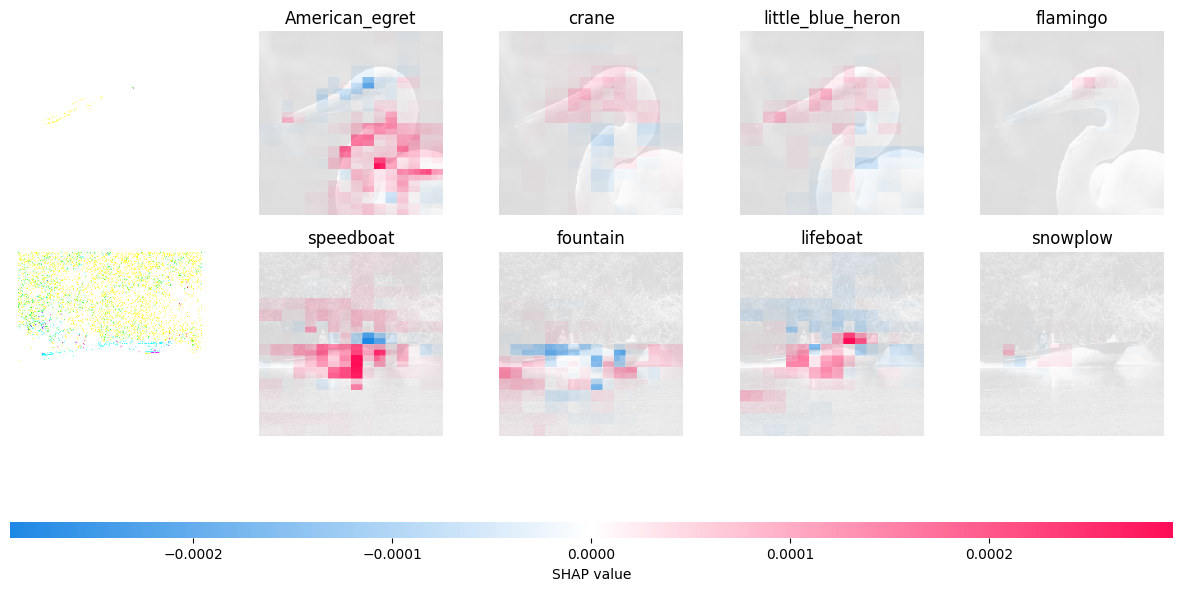

In [6]:
shap.image_plot(shap_values_fine)